In [1]:
# Load all the required libraries 
import pandas as pd
import os
import csv
import numpy as np
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Import the dataset
filename='C:/Users/chero/Documents/churn/churn_raw_data.csv'

In [3]:
df = pd.read_csv(filename)

In [4]:
print(df)

      Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0              1          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1              2          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2              3          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3              4          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4              5          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...          ...        ...         ...                                   ...   
9995        9996       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996        9997       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997        9998       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998        9999       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999       10000      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

              City State   

In [5]:
# show all the columns in the dataset 

dfclm = df.columns

In [6]:
##find number of columns and observations in the dataset 
dfclm.shape

(52,)

In [7]:
print(dfclm)

Index(['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment',
       'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'item1', 'item2', 'item3',
       'item4', 'item5', 'item6', 'item7', 'item8'],
      dtype='object')


In [8]:
## Begin the cleaning process 
#First remove the unnecessary first column with indexes 1,2,3,...

churnDATA = df.drop(df.columns[0], axis = 1)


In [9]:
churnDATA.head()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [10]:
## Check number of observations again 
churnDATA.shape

(10000, 51)

In [11]:
## from first skim, remove unnecessary variables based on the question 
df_rmv = churnDATA.drop(columns=['CaseOrder', 'Zip', 'Lat', 'Lng','Email','Contacts'])
df_rmv.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
count,10000.000000,7505.000000,7525.000000,7510.000000,10000.000000,10000.000000,9069.000000,10000.000000,8979.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.095936,53.275748,39936.762226,11.452955,0.398000,34.498858,174.076305,3398.842752,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,14432.698671,2.154758,20.753928,28358.469482,7.025921,0.635953,26.438904,43.335473,2187.396807,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.000000,0.000000,18.000000,740.660000,-1.348571,0.000000,1.000259,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,738.000000,0.000000,35.000000,19285.522500,8.054362,0.000000,7.890442,141.071078,1234.110529,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,2910.500000,1.000000,53.000000,33186.785000,10.202896,0.000000,36.196030,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,13168.000000,3.000000,71.000000,53472.395000,12.487644,1.000000,61.426670,203.777441,5587.096500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,111850.000000,10.000000,89.000000,258900.700000,47.049280,6.000000,71.999280,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [12]:
## Check number of observations again 
df_rmv.shape

(10000, 45)

In [13]:
## check the data types 
df_rmv.dtypes

Customer_id              object
Interaction              object
City                     object
State                    object
County                   object
Population                int64
Area                     object
Timezone                 object
Job                      object
Children                float64
Age                     float64
Education                object
Employment               object
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSecurity           object
OnlineBackup             object
DeviceProtection         object
TechSupport              object
StreamingTV              object
Streamin

In [14]:
## Start checking for the missing values 
df_rmv.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Customer_id  Interaction   City  State  County  Population   Area  \
0           False        False  False  False   False       False  False   
1           False        False  False  False   False       False  False   
2           False        False  False  False   False       False  False   
3           False        False  False  False   False       False  False   
4           False        False  False  False   False       False  False   
...           ...          ...    ...    ...     ...         ...    ...   
9995        False        False  False  False   False       False  False   
9996        False        False  False  False   False       False  False   
9997        False        False  False  False   False       False  False   
9998        False        False  False  False   False       False  False   
9999        False        False  False  False   False       False  False   

      Timezone    Job  Children  ... 

In [15]:
df_rmv.isnull().any(axis=1)


0        True
1       False
2        True
3       False
4       False
        ...  
9995     True
9996     True
9997     True
9998    False
9999     True
Length: 10000, dtype: bool

In [16]:
df_rmv.isna().any()


Customer_id             False
Interaction             False
City                    False
State                   False
County                  False
Population              False
Area                    False
Timezone                False
Job                     False
Children                 True
Age                      True
Education               False
Employment              False
Income                   True
Marital                 False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Yearly_equip_failure    False
Techie                   True
Contract                False
Port_modem              False
Tablet                  False
InternetService         False
Phone                    True
Multiple                False
OnlineSecurity          False
OnlineBackup            False
DeviceProtection        False
TechSupport              True
StreamingTV             False
StreamingMovies         False
PaperlessBilling        False
PaymentMet

In [17]:
## From the code output presented above, there are missing values in about 6 columns. 

In [18]:
## identify any missing numbers from the obervations on the columns 

mss_data = df_rmv.isnull().sum()
print(mss_data)

Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport              991
StreamingTV                0
StreamingMovies            0
PaperlessBilling           0
PaymentMethod              0
Tenure        

In [19]:
df_rmv.shape

(10000, 45)

In [20]:
df_rmv.dropna(how='any').shape

(2133, 45)

In [21]:
df_rmv.dropna(subset=['Children','Age','Income','Techie','Phone',
                      'TechSupport','Tenure','Bandwidth_GB_Year'],how='any').shape

(2133, 45)

In [22]:
df_rmv.shape

(10000, 45)

In [23]:
## Select only variables we will need for the question 
df_fnl = df_rmv.drop(columns=['Customer_id', 'Interaction', 'City', 'County',
                                 'State','Population','Area','Timezone','Job','Education',
                                 'Employment','Outage_sec_perweek',
                                 'Yearly_equip_failure','Techie','Contract','Port_modem',
                                 'Tablet','InternetService','Phone','Multiple',
                                 'OnlineSecurity','OnlineBackup','DeviceProtection',
                                 'TechSupport','StreamingTV','StreamingMovies',
                                 'PaperlessBilling','PaymentMethod','Tenure','MonthlyCharge','Bandwidth_GB_Year'])


In [24]:
df_fnl.shape

(10000, 14)

In [25]:
clean_dataset= df_fnl.dropna(subset=['Children','Age','Income'],how='any')

In [26]:
clean_dataset.shape

(4254, 14)

In [27]:
print(clean_dataset)

      Children   Age    Income        Marital                Gender Churn  \
1          1.0  27.0  21704.77        Married                Female   Yes   
3          1.0  48.0  18925.23        Married                  Male    No   
4          0.0  83.0  40074.19      Separated                  Male   Yes   
8          2.0  49.0  58634.51      Separated  Prefer not to answer    No   
11         2.0  56.0  18342.12        Married                Female    No   
...        ...   ...       ...            ...                   ...   ...   
9982       7.0  68.0  67377.48        Widowed                Female    No   
9984       0.0  50.0  40935.12  Never Married                Female    No   
9988       4.0  64.0  58232.67        Married  Prefer not to answer    No   
9991       0.0  52.0  30724.26       Divorced                  Male    No   
9998       1.0  39.0  16667.58      Separated                  Male    No   

      item1  item2  item3  item4  item5  item6  item7  item8  
1         3 

In [28]:
## Rename all the survey columns 'item1','item2','item3' etc
clean_dataset.rename(columns = 
{'item1':'Response',
'item2':'Fixes',
'item3':'Replacements',
'item4':'Reliability',
'item5':'Options',
'item6':'Respectfulness',
'item7':'Courteous',
'item8':'Listening'},
inplace=True)

c:\users\chero\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [29]:
print(clean_dataset)

      Children   Age    Income        Marital                Gender Churn  \
1          1.0  27.0  21704.77        Married                Female   Yes   
3          1.0  48.0  18925.23        Married                  Male    No   
4          0.0  83.0  40074.19      Separated                  Male   Yes   
8          2.0  49.0  58634.51      Separated  Prefer not to answer    No   
11         2.0  56.0  18342.12        Married                Female    No   
...        ...   ...       ...            ...                   ...   ...   
9982       7.0  68.0  67377.48        Widowed                Female    No   
9984       0.0  50.0  40935.12  Never Married                Female    No   
9988       4.0  64.0  58232.67        Married  Prefer not to answer    No   
9991       0.0  52.0  30724.26       Divorced                  Male    No   
9998       1.0  39.0  16667.58      Separated                  Male    No   

      Response  Fixes  Replacements  Reliability  Options  Respectfulness  

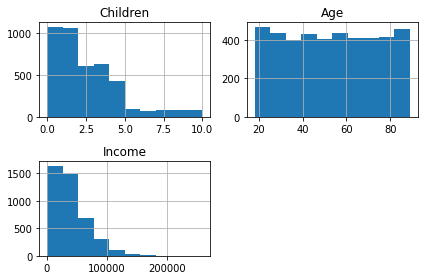

In [30]:
## Data visualization 

# Distribution of variables with numbers 
clean_dataset[['Children', 'Age', 'Income']].hist()
plt.savefig('churn_pyplot.jpg')
plt.tight_layout()
# plt.close()


<AxesSubplot:>

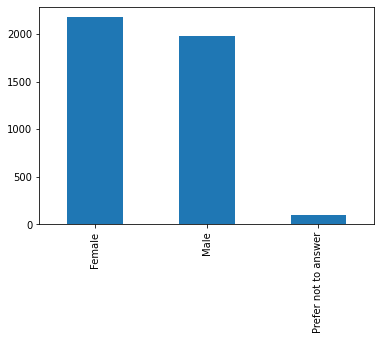

In [31]:
clean_dataset['Gender'].value_counts().plot(kind='bar')

<AxesSubplot:>

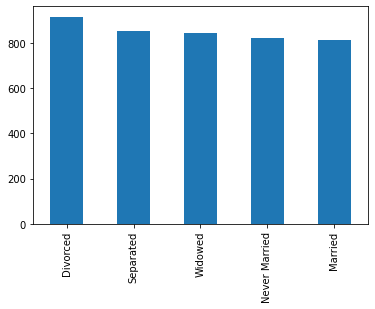

In [32]:
clean_dataset['Marital'].value_counts().plot(kind='bar')

<AxesSubplot:>

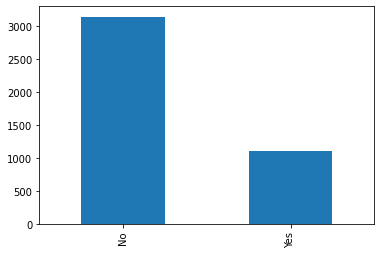

In [33]:
clean_dataset['Churn'].value_counts().plot(kind='bar')

In [34]:
# Extract Clean dataset
clean_dataset.to_csv('cleaned_clean.csv')

In [35]:
## PCA

In [36]:
features = ['Income','Response','Fixes','Replacements','Reliability','Options','Listening']
x = clean_dataset.loc[:, features].values

In [37]:
y = clean_dataset.loc[:,['Churn']].values

In [38]:
import sklearn

In [39]:
x = sklearn.preprocessing.StandardScaler().fit_transform(x)

In [40]:
pd.DataFrame(data = x, columns = features).head()

,Income,Response,Fixes,Replacements,Reliability,Options,Listening
0,-0.650330,-0.475605,0.47544,-0.465471,-0.494816,0.497445,0.515893
1,-0.748185,0.480099,0.47544,0.497619,-1.476144,1.473519,-0.477142
2,-0.003630,0.480099,0.47544,0.497619,-0.494816,0.497445,1.508928
3,0.649791,1.435803,0.47544,0.497619,-0.494816,0.497445,0.515893
4,-0.768713,0.480099,0.47544,-0.465471,0.486512,0.497445,0.515893


In [41]:
pca = PCA(n_components=2)


In [42]:
principalComponents = pca.fit_transform(x)


In [43]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [44]:
principalDf.head(5)


,principal component 1,principal component 2
0,-0.165458,-0.440064
1,0.370926,-2.244477
2,1.188767,-0.430288
3,1.398904,-0.848180
4,0.456823,0.081934


In [45]:
clean_dataset[['Churn']].head()


,Churn
1,Yes
3,No
4,Yes
8,No
11,No


In [46]:
dfPCA = pd.concat([principalDf, clean_dataset[['Churn']]], axis = 1)
dfPCA.head(5)

,principal component 1,principal component 2,Churn
0,-0.165458,-0.440064,NaN
1,0.370926,-2.244477,Yes
2,1.188767,-0.430288,NaN
3,1.398904,-0.848180,No
4,0.456823,0.081934,Yes


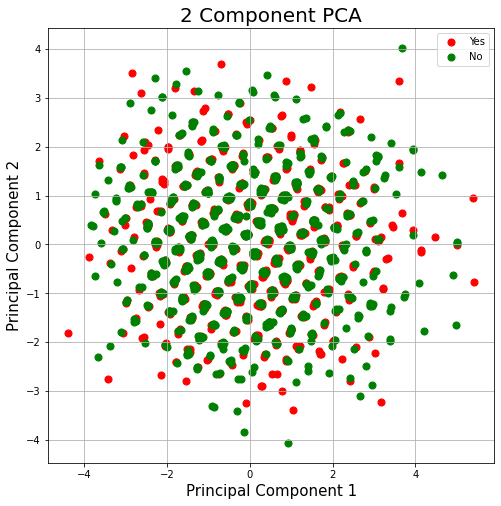

In [47]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


Churns = ['Yes','No']
colors = ['r', 'g']
for Churn, color in zip(Churns,colors):
    indicesToKeep = dfPCA['Churn'] == Churn
    ax.scatter(dfPCA.loc[indicesToKeep, 'principal component 1']
               , dfPCA.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(Churns)
ax.grid()

In [48]:
pca.explained_variance_ratio_


array([0.33504605, 0.21633318])